In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from yellowbrick.regressor import ResidualsPlot,PredictionError, AlphaSelection
from sklearn.preprocessing import LabelEncoder, StandardScaler
import random
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from pandas import DataFrame
from sklearn.feature_selection import RFE, SelectKBest, chi2, SelectFromModel
from sklearn.linear_model import LogisticRegression, LassoCV,RidgeClassifier
from sklearn.svm import LinearSVC
from functools import reduce
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
import pydot
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError,ClassificationReport,PrecisionRecallCurve
from sklearn.naive_bayes import GaussianNB
from yellowbrick.features import ParallelCoordinates
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib
from sklearn.model_selection import cross_val_score

C:\Users\Eric\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [144]:
dfTheseTeams = pd.read_csv('final-csv-data/NFL-Curr-Teams.csv')
dfOldTeams = pd.read_csv('final-csv-data/NFL-Prev-Teams.csv')
dfMVP2018 = pd.read_csv('MVPData/2019QBs.csv')
dfMVPTotal = pd.read_csv('MVPData/QBTotal2018.csv')
dfAllMVPs = pd.read_csv('MVPData/NFLMVPTotal.csv')

In [145]:
train = dfMVP2018
test = dfMVPTotal
train['Type'] = 'Train'
test['Type'] = 'Test'
fulldata = pd.concat([train,test],axis=0,sort=False)
rookRBNames = dfMVP2018.iloc[:, 1]
dfMVP2018.head()

,Rk,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,...,ANY/A,SkPerc,4QC,GWD,QBWinPerc,YdsAboveAvg,QBRAboveAvg,TdsAboveAvg,ANY/AAboveAvg,Type
0,1,Jared Goff,LAR,25,QB,16,16,9-7-0,394,626,...,6.46,3.40,1,2,0.56,1077.91,-7.18,-0.91,-0.19,Train
1,2,Jameis Winston,TAM,25,QB,16,16,7-9-0,380,626,...,6.15,7.00,2,2,0.44,1548.91,1.72,10.09,-0.50,Train
2,3,Matt Ryan,ATL,34,QB,15,15,7-8-0,408,616,...,6.08,7.20,3,2,0.47,905.91,3.02,3.09,-0.57,Train
3,4,Tom Brady,NWE,42,QB,16,16,12-4-0,373,613,...,6.24,4.20,1,1,0.75,496.91,-2.88,1.09,-0.41,Train
4,5,Carson Wentz,PHI,27,QB,16,16,9-7-0,388,607,...,6.26,5.70,2,4,0.56,478.91,7.52,4.09,-0.39,Train


In [146]:
fulldata.describe()

,Rk,Age,G,GS,Cmp,Att,CmpPerc,Yds,TD,TDPerc,...,QBWinPerc,YdsAboveAvg,QBRAboveAvg,TdsAboveAvg,ANY/AAboveAvg,Sack,SYds,TDsAboveAvg,MVP,AdjWin
count,448.00,448.00,448.00,448.00,448.00,448.00,448.00,448.00,448.00,448.00,...,448.00,448.00,448.00,32.00,448.00,416.00,416.00,416.00,416.00,416.00
mean,16.50,28.62,14.00,13.60,285.16,458.08,61.81,3303.42,20.60,4.38,...,0.51,4.90,0.06,0.50,-0.01,29.30,190.60,0.00,2.17,51.26
std,9.24,4.51,2.57,3.00,82.21,117.46,4.43,975.66,9.00,1.33,...,0.20,937.24,13.20,7.34,1.17,10.29,70.73,8.81,14.57,19.70
min,1.00,21.00,7.00,5.00,112.00,205.00,46.50,1089.00,3.00,1.00,...,0.00,-2559.38,-42.82,-16.91,-3.44,6.00,36.00,-17.28,0.00,0.00
25%,8.75,25.00,12.00,11.00,217.00,367.75,59.08,2498.50,13.00,3.40,...,0.38,-694.31,-8.58,-3.91,-0.87,22.00,140.00,-6.69,0.00,37.50
50%,16.50,28.00,15.00,15.00,291.50,472.50,61.90,3378.00,20.00,4.20,...,0.50,69.64,0.27,0.59,-0.08,28.00,184.50,-0.80,0.00,50.00
75%,24.25,32.00,16.00,16.00,349.00,552.25,64.93,4040.50,27.00,5.20,...,0.67,710.14,9.72,4.09,0.73,36.00,234.00,6.31,0.00,66.67
max,32.00,42.00,16.00,16.00,471.00,727.00,74.40,5477.00,55.00,9.00,...,1.00,2134.56,33.94,20.09,3.40,68.00,424.00,33.16,100.00,100.00


In [147]:
test.isnull().mean().sort_values(ascending=False)*100

Type            0.00
Att             0.00
Lng             0.00
IntPerc         0.00
Int             0.00
TDPerc          0.00
TD              0.00
Yds             0.00
CmpPerc         0.00
Cmp             0.00
AdjWin          0.00
QBrec           0.00
GS              0.00
G               0.00
Pos             0.00
Age             0.00
Tm              0.00
Player          0.00
Y/A             0.00
AY/A            0.00
Y/C             0.00
Y/G             0.00
MVP             0.00
ANY/AAboveAvg   0.00
TDsAboveAvg     0.00
QBRAboveAvg     0.00
YdsAboveAvg     0.00
QBWinPerc       0.00
GWD             0.00
4QC             0.00
SkPerc          0.00
ANY/A           0.00
NY/A            0.00
SYds            0.00
Sack            0.00
QBR             0.00
Rate            0.00
Rk              0.00
dtype: float64

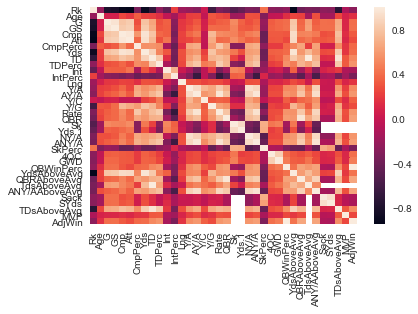

In [148]:
%matplotlib inline
corr = fulldata.corr()
heatmap = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
fig = heatmap.get_figure()
#fig.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')

In [149]:
#train, test = train_test_split(dfOldTeams, test_size = 0.25, random_state = 99)
features = dfMVPTotal[['Age','G','GS','Cmp','Att','CmpPerc','Yds','TD','TDPerc','Int','IntPerc','Lng','Y/A','AY/A','Y/C','Y/G','Rate','QBR','Sack','SYds','NY/A','ANY/A','SkPerc','4QC','GWD','QBWinPerc','YdsAboveAvg','QBRAboveAvg','TDsAboveAvg','ANY/AAboveAvg']]
#features = dfOldTeams[['Height','Weight','Seasons-Col','Games-Col','Yards-Col', 'Carries-Col', 'Avg-Carry-Col', 'Avg-Game-Col', 'TDs-Col', 'Rec-Col', 'RecYards-Col', 'RecTDs-Col', '40 yd dash', 'Vertical','DraftPos','DC Pos']]
labels = dfMVPTotal[['MVP']].astype(int)

clf = RandomForestClassifier()
clf.fit(features,labels)
preds = clf.predict(features)
accuracy = accuracy_score(preds,labels)
print(accuracy)
VI = DataFrame(clf.feature_importances_,columns = ["RF"], index=features.columns)
VI = VI.reset_index()
VI.sort_values(["RF"],ascending=0)

0.9951923076923077


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


,index,RF
17,QBR,0.15
8,TDPerc,0.14
27,QBRAboveAvg,0.10
7,TD,0.10
25,QBWinPerc,0.09
21,ANY/A,0.07
29,ANY/AAboveAvg,0.06
13,AY/A,0.03
4,Att,0.03
10,IntPerc,0.03


In [150]:
model = LogisticRegression(solver = 'lbfgs')
rfe = RFE(model,20)
fit = rfe.fit(features, labels)
selected = DataFrame(rfe.support_,columns=["RFE"],index=features.columns)
selected = selected.reset_index()
selected[selected["RFE"]==True]

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWar

,index,RFE
0,Age,True
3,Cmp,True
4,Att,True
5,CmpPerc,True
6,Yds,True
7,TD,True
8,TDPerc,True
9,Int,True
10,IntPerc,True
11,Lng,True


In [151]:
model = ExtraTreesClassifier()
model.fit(features,labels)

print(model.feature_importances_)

FI = DataFrame(model.feature_importances_, columns=["Extratrees"],index=features.columns)
FI = FI.reset_index()
FI.sort_values(['Extratrees'],ascending=0)

[0.03720634 0.         0.00511182 0.01192758 0.01395608 0.0189448
 0.01363152 0.07064627 0.08993404 0.01260916 0.03156617 0.0259211
 0.02584436 0.06046287 0.00764035 0.03249538 0.04316428 0.09158081
 0.01300507 0.02390925 0.00043216 0.06520055 0.01801432 0.03918817
 0.02880071 0.07346405 0.03147098 0.04977005 0.0199361  0.04416565]


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,index,Extratrees
17,QBR,0.09
8,TDPerc,0.09
25,QBWinPerc,0.07
7,TD,0.07
21,ANY/A,0.07
13,AY/A,0.06
27,QBRAboveAvg,0.05
29,ANY/AAboveAvg,0.04
16,Rate,0.04
23,4QC,0.04


In [152]:
model = SelectKBest(score_func=chi2,k=5)
fit = model.fit(features.abs(),labels)

pd.options.display.float_format='{:.2f}'.format
chi_sq = DataFrame(fit.scores_,columns=["Chi_Square"],index=features.columns)

chi_sq = chi_sq.reset_index()
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
6,Yds,5221.32
26,YdsAboveAvg,2621.67
3,Cmp,254.10
28,TDsAboveAvg,231.32
7,TD,212.24
4,Att,192.70
27,QBRAboveAvg,146.70
15,Y/G,137.96
17,QBR,107.65
16,Rate,68.00


In [153]:
lsvc = LinearSVC(C=0.01,penalty="l1",dual=False).fit(features,labels)
model = SelectFromModel(lsvc,prefit=True)
l1 = DataFrame(model.get_support(),columns=["L1"],index=features.columns)
l1 = l1.reset_index()
l1[l1['L1'] == True]

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,index,L1
4,Att,True
6,Yds,True
7,TD,True
15,Y/G,True
19,SYds,True
26,YdsAboveAvg,True
27,QBRAboveAvg,True
28,TDsAboveAvg,True


In [154]:
dfs = [VI, selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'),dfs)
print(final_results)

            index   RF    RFE  Extratrees  Chi_Square     L1
0             Age 0.00   True        0.04        3.25  False
1               G 0.00  False        0.00        2.69  False
2              GS 0.02  False        0.01        4.03  False
3             Cmp 0.01   True        0.01      254.10  False
4             Att 0.03   True        0.01      192.70   True
5         CmpPerc 0.01   True        0.02        4.53  False
6             Yds 0.00   True        0.01     5221.32   True
7              TD 0.10   True        0.07      212.24   True
8          TDPerc 0.14   True        0.09       22.40  False
9             Int 0.00   True        0.01        8.33  False
10        IntPerc 0.03   True        0.03        4.42  False
11            Lng 0.02   True        0.03       13.63  False
12            Y/A 0.00  False        0.03        2.04  False
13           AY/A 0.03  False        0.06        7.94  False
14            Y/C 0.01  False        0.01        0.75  False
15            Y/G 0.01  

In [155]:
columns = ['RF','Chi_Square','Extratrees']
score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

score_table['final_score'] = score_table.sum(axis=1)
score_table.sort_values('final_score',ascending=0)

,index,RF,Chi_Square,Extratrees,RFE,L1,final_score
7,TD,1,1,1,1,1,5
8,TDPerc,1,0,1,1,0,3
28,TDsAboveAvg,0,1,0,1,1,3
27,QBRAboveAvg,1,0,0,1,1,3
6,Yds,0,1,0,1,1,3
17,QBR,1,0,1,1,0,3
26,YdsAboveAvg,0,1,0,0,1,2
19,SYds,0,0,0,1,1,2
25,QBWinPerc,1,0,1,0,0,2
15,Y/G,0,0,0,1,1,2


In [156]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    return(vif)
features = features[list(score_table[score_table['final_score'] >= 2]['index'])]
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)
list(vif['Features'])

['SYds', 'QBWinPerc', 'YdsAboveAvg', 'QBRAboveAvg', 'TDsAboveAvg']

In [157]:
train, test = train_test_split(dfMVPTotal, test_size = 0.4, random_state = 99)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
print(train.shape)
#feature_list =train[['Age','G','GS','Cmp','Att','CmpPerc','Yds','TD','TDPerc','Int','IntPerc','Lng','Y/A','AY/A','Y/C','Y/G','Rate','QBR','Sack','SYds','NY/A','ANY/A','SkPerc','4QC','GWD','QBWinPerc','YdsAboveAvg','QBRAboveAvg','TDsAboveAvg','ANY/AAboveAvg']] 
train_samples = train[['Age','G','GS','Cmp','Att','CmpPerc','Yds','TD','TDPerc','Int','IntPerc','Lng','Y/A','AY/A','Y/C','Y/G','Rate','QBR','Sack','SYds','NY/A','ANY/A','SkPerc','4QC','GWD','QBWinPerc','YdsAboveAvg','QBRAboveAvg','TDsAboveAvg','ANY/AAboveAvg']]
#train[list(vif['Features'])]
train_targets = train[['MVP']].astype(float)

test_samples = test[['Age','G','GS','Cmp','Att','CmpPerc','Yds','TD','TDPerc','Int','IntPerc','Lng','Y/A','AY/A','Y/C','Y/G','Rate','QBR','Sack','SYds','NY/A','ANY/A','SkPerc','4QC','GWD','QBWinPerc','YdsAboveAvg','QBRAboveAvg','TDsAboveAvg','ANY/AAboveAvg']]
#test[list(vif['Features'])]#test[['Height','Weight','Seasons-Col','Games-Col','Yards-Col', 'Carries-Col', 'Avg-Carry-Col', 'Avg-Game-Col', 'TDs-Col', 'Rec-Col', 'RecYards-Col', 'RecTDs-Col', '40 yd dash', 'Vertical','DraftPos','DC Pos']]
test_targets = test[['MVP']].astype(float)

(249, 38)


In [158]:
def scores(y,model):
    model.fit(train_samples,train_targets.values.ravel())
    y_pred = model.predict(test_samples)
    print("Mean squared error: %.3f" % mean_squared_error(test_targets, y_pred))
    print('R2 score: %.3f' % r2_score(test_targets, y_pred))

    cvScore = cross_val_score(model, test_samples, test_targets.values.ravel(), cv = 3, scoring = 'r2')
    print("R2 cross validation score: %0.2f (+/- %0.2f)" % (cvScore.mean(), cvScore.std() * 2))
    
    y.append(mean_squared_error(test_targets, y_pred))
    y.append(r2_score(test_targets, y_pred))
    y.append((cvScore.mean(), cvScore.std() * 2))

In [159]:
clf = RandomForestClassifier()
np.ravel(train_targets)
clf.fit(train_samples,train_targets)

pred_train = clf.predict(train_samples)
pred_test = clf.predict(test_samples)

accuracy_train = accuracy_score(pred_train,train_targets)
accuracy_test = accuracy_score(pred_test,test_targets)

n_estimators = [int(x) for x in np.linspace(start=10, stop=500, num=10)]
max_features = ['auto','sqrt']
max_depth=[int(x) for x in np.linspace(3,10,num=1)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf,
              'bootstrap':bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(train_samples,train_targets)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.2s finished
C:\Users\Eric\Anaconda3\lib\site-packages\

RandomizedSearchCV(cv=2, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [160]:
rookRBTest = dfMVP2018.iloc[0:, [3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
#[14,30,31,32,33,34]]
#print(rf_random.predict(rookRBTest))
FactWeightForest = []
FactWeightForest = [[i,j] for i,j in zip(clf.feature_importances_,train_samples)]
treesPred = []
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    treesPred.append(clf.predict([this]))
    print(clf.predict([this]),j)
    print(rf_random.predict([this]),j)
print(accuracy_test,accuracy_train)
y_forestReg=[]
scores(y_forestReg,clf)
print(y_forestReg)

[0.] Jared Goff
[0.] Jared Goff
[0.] Jameis Winston
[0.] Jameis Winston
[0.] Matt Ryan
[0.] Matt Ryan
[0.] Tom Brady
[0.] Tom Brady
[0.] Carson Wentz
[0.] Carson Wentz
[0.] Dak Prescott
[0.] Dak Prescott
[0.] Philip Rivers
[0.] Philip Rivers
[0.] Aaron Rodgers*
[0.] Aaron Rodgers*
[0.] Kyler Murray
[0.] Kyler Murray
[0.] Baker Mayfield
[0.] Baker Mayfield
[0.] Andy Dalton
[0.] Andy Dalton
[0.] Mitchell Trubisky
[0.] Mitchell Trubisky
[0.] Russell Wilson*
[0.] Russell Wilson*
[0.] Derek Carr
[0.] Derek Carr
[0.] Ryan Fitzpatrick
[0.] Ryan Fitzpatrick
[0.] Deshaun Watson*
[0.] Deshaun Watson*
[0.] Kyle Allen
[0.] Kyle Allen
[0.] Patrick Mahomes*
[0.] Patrick Mahomes*
[0.] Jimmy Garoppolo
[0.] Jimmy Garoppolo
[0.] Gardner Minshew
[0.] Gardner Minshew
[0.] Josh Allen
[0.] Josh Allen
[0.] Daniel Jones
[0.] Daniel Jones
[0.] Jacoby Brissett
[0.] Jacoby Brissett
[0.] Kirk Cousins
[0.] Kirk Cousins
[0.] Sam Darnold
[0.] Sam Darnold
[100.] Lamar Jackson*
[0.] Lamar Jackson*
[0.] Drew Brees*
[0.

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [161]:
clf = RandomForestClassifier(**rf_random.best_params_)
np.ravel(train_targets)
clf.fit(train_samples,train_targets)

pred_train = clf.predict(train_samples)
pred_test = clf.predict(test_samples)

accuracy_trainRand = accuracy_score(pred_train,train_targets)
accuracy_testRand = accuracy_score(pred_test,test_targets)
FactWeightNewForest = []
FactWeightNewForest = [[i,j] for i,j in zip(clf.feature_importances_,train_samples)]
newTreesPred = []
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    #print(i)
    newTreesPred.append(clf.predict([this]))
    print(clf.predict([this]),j)
print(accuracy_testRand)
y_newForestReg=[]
scores(y_newForestReg,clf)

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[0.] Jared Goff
[0.] Jameis Winston
[0.] Matt Ryan
[0.] Tom Brady
[0.] Carson Wentz
[0.] Dak Prescott
[0.] Philip Rivers
[0.] Aaron Rodgers*
[0.] Kyler Murray
[0.] Baker Mayfield
[0.] Andy Dalton
[0.] Mitchell Trubisky
[0.] Russell Wilson*
[0.] Derek Carr
[0.] Ryan Fitzpatrick
[0.] Deshaun Watson*
[0.] Kyle Allen
[0.] Patrick Mahomes*
[0.] Jimmy Garoppolo
[0.] Gardner Minshew
[0.] Josh Allen
[0.] Daniel Jones
[0.] Jacoby Brissett
[0.] Kirk Cousins
[0.] Sam Darnold
[0.] Lamar Jackson*
[0.] Drew Brees*
[0.] Matthew Stafford
[0.] Ryan Tannehill
[0.] Mason Rudolph
[0.] Joe Flacco
[0.] Case Keenum
0.9940119760479041
Mean squared error: 119.760
R2 score: -0.012


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


R2 cross validation score: 0.32 (+/- 0.96)


In [162]:
clf = GradientBoostingClassifier()
clf.fit(train_samples,train_targets)

pred_train = clf.predict(train_samples)
pred_test = clf.predict(test_samples)

accuracy_trainGrad = accuracy_score(pred_train,train_targets)
accuracy_testGrad = accuracy_score(pred_test,test_targets)
FactWeightGrad = []
FactWeightGrad = [[i,j] for i,j in zip(clf.feature_importances_,train_samples)]
gradientPred = []
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    #print(i)
    gradientPred.append(clf.predict([this]))
    print(clf.predict([this]),j)
print(accuracy_testGrad)
y_gradReg=[]
scores(y_gradReg,clf)

[0.] Jared Goff
[0.] Jameis Winston
[0.] Matt Ryan
[0.] Tom Brady
[0.] Carson Wentz
[0.] Dak Prescott
[0.] Philip Rivers
[0.] Aaron Rodgers*
[0.] Kyler Murray
[0.] Baker Mayfield

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



[0.] Andy Dalton
[0.] Mitchell Trubisky
[0.] Russell Wilson*
[0.] Derek Carr
[0.] Ryan Fitzpatrick
[0.] Deshaun Watson*
[0.] Kyle Allen
[0.] Patrick Mahomes*
[0.] Jimmy Garoppolo
[0.] Gardner Minshew
[0.] Josh Allen
[0.] Daniel Jones
[0.] Jacoby Brissett
[0.] Kirk Cousins
[0.] Sam Darnold
[0.] Lamar Jackson*
[0.] Drew Brees*
[0.] Matthew Stafford
[0.] Ryan Tannehill
[0.] Mason Rudolph
[0.] Joe Flacco
[0.] Case Keenum
0.9700598802395209
Mean squared error: 299.401
R2 score: -1.530
R2 cross validation score: -0.02 (+/- 1.66)


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [163]:
clf = MLPClassifier()
clf.fit(train_samples,train_targets)

pred_train = clf.predict(train_samples)
pred_test = clf.predict(test_samples)

accuracy_trainMLP = accuracy_score(pred_train,train_targets)
accuracy_testMLP = accuracy_score(pred_test,test_targets)
MLPPred = []
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    #print(i)
    MLPPred.append(clf.predict([this]))
    print(clf.predict([this]),j)
print(accuracy_testMLP)
y_MLPReg=[]
scores(y_MLPReg,clf)

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.] Jared Goff
[0.] Jameis Winston
[0.] Matt Ryan
[0.] Tom Brady
[0.] Carson Wentz
[1.] Dak Prescott
[0.] Philip Rivers
[0.] Aaron Rodgers*
[0.] Kyler Murray
[0.] Baker Mayfield
[0.] Andy Dalton
[0.] Mitchell Trubisky
[0.] Russell Wilson*
[0.] Derek Carr
[0.] Ryan Fitzpatrick
[100.] Deshaun Watson*
[0.] Kyle Allen
[0.] Patrick Mahomes*
[0.] Jimmy Garoppolo
[0.] Gardner Minshew
[0.] Josh Allen
[0.] Daniel Jones
[0.] Jacoby Brissett
[0.] Kirk Cousins
[0.] Sam Darnold
[100.] Lamar Jackson*
[0.] Drew Brees*
[0.] Matthew Stafford
[0.] Ryan Tannehill
[0.] Mason Rudolph
[0.] Joe Flacco
[0.] Case Keenum
0.9640718562874252
Mean squared error: 239.521
R2 score: -1.024
R2 cross validation score: -0.01 (+/- 0.02)


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [164]:
clf = GaussianNB()
clf.fit(train_samples,train_targets)

pred_train = clf.predict(train_samples)
pred_test = clf.predict(test_samples)

accuracy_trainGauss = accuracy_score(pred_train,train_targets)
accuracy_testGauss = accuracy_score(pred_test,test_targets)
GaussPred = []
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    #print(i)
    GaussPred.append(clf.predict([this]))
    print(clf.predict([this]),j)
#for i,j in zip(pred_train, rookRBNames):
 #   print(i,j)
print(accuracy_testGauss)
y_clfReg=[]
scores(y_clfReg,clf)

[0.] Jared Goff
[0.] Jameis Winston
[0.] Matt Ryan
[0.] Tom Brady
[0.] Carson Wentz
[100.] Dak Prescott
[0.] Philip Rivers
[0.] Aaron Rodgers*
[0.] Kyler Murray
[0.] Baker Mayfield
[0.] Andy Dalton
[0.] Mitchell Trubisky
[100.] Russell Wilson*
[0.] Derek Carr
[0.] Ryan Fitzpatrick
[0.] Deshaun Watson*
[0.] Kyle Allen
[0.] Patrick Mahomes*
[0.] Jimmy Garoppolo
[0.] Gardner Minshew
[0.] Josh Allen
[0.] Daniel Jones
[0.] Jacoby Brissett
[0.] Kirk Cousins
[0.] Sam Darnold
[100.] Lamar Jackson*
[0.] Drew Brees*
[0.] Matthew Stafford
[0.] Ryan Tannehill
[0.] Mason Rudolph
[0.] Joe Flacco
[0.] Case Keenum
0.8922155688622755
Mean squared error: 1077.844
R2 score: -8.109
R2 cross validation score: 0.32 (+/- 0.96)


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


In [165]:
def normReg(x,predArr):
    return (x - (sum(predArr)/float(len(predArr)))) / np.std(predArr)
linReg = linear_model.LinearRegression(fit_intercept = False)
linReg.fit(train_samples,train_targets)
linPred = []
normlinPred = []
y_predlinRB = linReg.predict(test_samples)
linR2RB = abs(1/(r2_score(test_targets,y_predlinRB)))
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    linPred.append(linReg.predict([this]))
for data in linPred:
    normlinPred.append(normReg(data,linPred))
for norm, name in zip(normlinPred,rookRBNames):
    print(norm,name)
print(linR2RB)
y_linReg=[]
scores(y_linReg,linReg)

[[-0.90052061]] Jared Goff
[[-0.02812405]] Jameis Winston
[[-0.80913365]] Matt Ryan
[[-0.59232385]] Tom Brady
[[-0.98861757]] Carson Wentz
[[1.00652716]] Dak Prescott
[[-1.0811294]] Philip Rivers
[[0.55097833]] Aaron Rodgers*
[[0.1142307]] Kyler Murray
[[-0.65176792]] Baker Mayfield
[[-1.51984705]] Andy Dalton
[[-0.57019608]] Mitchell Trubisky
[[1.10608739]] Russell Wilson*
[[-0.64274921]] Derek Carr
[[-1.41633347]] Ryan Fitzpatrick
[[1.48113851]] Deshaun Watson*
[[-0.32135205]] Kyle Allen
[[0.91008966]] Patrick Mahomes*
[[0.77052448]] Jimmy Garoppolo
[[0.17852776]] Gardner Minshew
[[1.84738721]] Josh Allen
[[-0.33983295]] Daniel Jones
[[-0.34373542]] Jacoby Brissett
[[0.64666107]] Kirk Cousins
[[0.00687299]] Sam Darnold
[[3.24801666]] Lamar Jackson*
[[0.60700765]] Drew Brees*
[[-0.39658198]] Matthew Stafford
[[-0.6910908]] Ryan Tannehill
[[-0.05593105]] Mason Rudolph
[[-0.57112131]] Joe Flacco
[[-0.55366116]] Case Keenum
3.0925651364032793
Mean squared error: 156.588
R2 score: -0.323


In [166]:
ridgeReg = linear_model.Ridge(fit_intercept = False)
ridgeReg.fit(train_samples,train_targets)
ridgePred = []
normridgePred = []
y_predRidgeRB = ridgeReg.predict(test_samples)
ridgeR2RB = abs(1/(r2_score(test_targets,y_predRidgeRB)))
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    ridgePred.append(ridgeReg.predict([this]))
for data in ridgePred:
    normridgePred.append(normReg(data,ridgePred))
for norm, name in zip(normridgePred,rookRBNames):
    print(norm,name)
print(ridgeR2RB)
y_ridgeReg=[]
scores(y_ridgeReg,ridgeReg)

[[-0.87506972]] Jared Goff
[[-0.18021494]] Jameis Winston
[[-0.66904291]] Matt Ryan
[[-0.43137823]] Tom Brady
[[-0.54974477]] Carson Wentz
[[1.06591632]] Dak Prescott
[[-1.0820982]] Philip Rivers
[[0.47963343]] Aaron Rodgers*
[[0.06707817]] Kyler Murray
[[-0.79005759]] Baker Mayfield
[[-1.35096024]] Andy Dalton
[[-0.86958508]] Mitchell Trubisky
[[1.49875301]] Russell Wilson*
[[-0.61247842]] Derek Carr
[[-1.33621157]] Ryan Fitzpatrick
[[1.61720356]] Deshaun Watson*
[[-0.63661965]] Kyle Allen
[[0.571594]] Patrick Mahomes*
[[0.52535406]] Jimmy Garoppolo
[[0.08687805]] Gardner Minshew
[[2.17198133]] Josh Allen
[[-0.32468857]] Daniel Jones
[[-0.51936903]] Jacoby Brissett
[[0.55585562]] Kirk Cousins
[[-0.24564129]] Sam Darnold
[[3.13322088]] Lamar Jackson*
[[0.57015381]] Drew Brees*
[[-0.45952452]] Matthew Stafford
[[-0.37021528]] Ryan Tannehill
[[-0.01316993]] Mason Rudolph
[[-0.49769468]] Joe Flacco
[[-0.5298576]] Case Keenum
4.18747996987935
Mean squared error: 146.583
R2 score: -0.239
R2

In [167]:
lassoReg = linear_model.Lasso(fit_intercept = False)
lassoReg.fit(train_samples,train_targets)
lassoPred = []
normlassoPred = []
y_predLassoRB = lassoReg.predict(test_samples)
lassoR2RB = abs(1/(r2_score(test_targets,y_predLassoRB)))
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    lassoPred.append(lassoReg.predict([this]))
for data in lassoPred:
    normlassoPred.append(normReg(data,lassoPred))
for norm, name in zip(normlassoPred,rookRBNames):
    print(norm,name)
print(lassoR2RB)
print(lassoReg.coef_)
y_lassoReg=[]
scores(y_lassoReg,lassoReg)

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[-0.74299479] Jared Goff
[-0.26835618] Jameis Winston
[-0.73217121] Matt Ryan
[-0.33075634] Tom Brady
[-0.25491487] Carson Wentz
[1.08050123] Dak Prescott
[-0.8415668] Philip Rivers
[0.32985986] Aaron Rodgers*
[-0.24675325] Kyler Murray
[-0.96212296] Baker Mayfield
[-1.25615868] Andy Dalton
[-1.13265186] Mitchell Trubisky
[1.45325897] Russell Wilson*
[-0.49480331] Derek Carr
[-1.19947096] Ryan Fitzpatrick
[1.07342031] Deshaun Watson*
[-1.08950576] Kyle Allen
[0.45777448] Patrick Mahomes*
[0.31909343] Jimmy Garoppolo
[0.18722845] Gardner Minshew
[1.35504286] Josh Allen
[-0.15346889] Daniel Jones
[-0.49961279] Jacoby Brissett
[0.72700358] Kirk Cousins
[-0.47242995] Sam Darnold
[3.56934657] Lamar Jackson*
[0.99493322] Drew Brees*
[0.07937536] Matthew Stafford
[0.56076756] Ryan Tannehill
[-0.13205719] Mason Rudolph
[-1.17563526] Joe Flacco
[-0.20217482] Case Keenum
6.601174090161236
[-0.         -0.         -0.         -0.06825301 -0.02584566  0.43099748
  0.0105516   0.         -0.       

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [168]:
logReg = linear_model.LogisticRegression(fit_intercept = False)
logReg.fit(train_samples,train_targets)
logPred = []
y_predlogRB = logReg.predict(test_samples)
logR2RB = abs(1/(r2_score(test_targets,y_predlogRB)))
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    logPred.append(logReg.predict([this]))
    print(logReg.predict([this]),j)
accuracy_testLog = accuracy_score(pred_test,test_targets)
print(accuracy_testLog)
y_logReg=[]
scores(y_logReg,logReg)

[0.] Jared Goff
[0.] Jameis Winston
[0.] Matt Ryan
[0.] Tom Brady
[0.] Carson Wentz
[0.] Dak Prescott
[0.] Philip Rivers
[0.] Aaron Rodgers*
[0.] Kyler Murray
[0.] Baker Mayfield
[0.] Andy Dalton
[0.] Mitchell Trubisky
[100.] Russell Wilson*
[0.] Derek Carr
[0.] Ryan Fitzpatrick
[0.] Deshaun Watson*
[0.] Kyle Allen
[0.] Patrick Mahomes*
[0.] Jimmy Garoppolo
[0.] Gardner Minshew
[0.] Josh Allen
[0.] Daniel Jones
[0.] Jacoby Brissett
[0.] Kirk Cousins
[0.] Sam Darnold
[1.] Lamar Jackson*
[0.] Drew Brees*
[0.] Matthew Stafford
[0.] Ryan Tannehill
[0.] Mason Rudolph
[0.] Joe Flacco
[0.] Case Keenum
0.8922155688622755
Mean squared error: 179.641
R2 score: -0.518
R2 cross validation score: 0.32 (+/- 0.96)


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: Future

In [169]:
sgd = linear_model.SGDClassifier(max_iter=1000)
sgd.fit(train_samples,train_targets)
sgdPred = []
y_predsgdRB = sgd.predict(test_samples)
sgdR2RB = abs(1/(r2_score(test_targets,y_predsgdRB)))
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    sgdPred.append(sgd.predict([this]))
    print(sgd.predict([this]),j)
accuracy_testSGD = accuracy_score(pred_test,test_targets)
print(accuracy_testSGD)
y_SGDReg=[]
scores(y_SGDReg,sgd)

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.] Jared Goff
[0.] Jameis Winston
[0.] Matt Ryan
[0.] Tom Brady
[0.] Carson Wentz
[0.] Dak Prescott
[0.] Philip Rivers
[0.] Aaron Rodgers*
[0.] Kyler Murray
[0.] Baker Mayfield
[0.] Andy Dalton
[0.] Mitchell Trubisky
[0.]

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


 Russell Wilson*
[0.] Derek Carr
[0.] Ryan Fitzpatrick
[0.] Deshaun Watson*
[0.] Kyle Allen
[0.] Patrick Mahomes*
[0.] Jimmy Garoppolo
[0.] Gardner Minshew
[0.] Josh Allen
[0.] Daniel Jones
[0.] Jacoby Brissett
[0.] Kirk Cousins
[0.] Sam Darnold
[100.] Lamar Jackson*
[0.] Drew Brees*
[0.] Matthew Stafford
[0.] Ryan Tannehill
[0.] Mason Rudolph
[0.] Joe Flacco
[0.] Case Keenum
0.8922155688622755
Mean squared error: 119.766
R2 score: -0.012
R2 cross validation score: 0.32 (+/- 0.96)


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinit

In [170]:
theilReg = linear_model.TheilSenRegressor(random_state=0)
theilReg.fit(train_samples,train_targets)
theilRegPred = []
normtheilRegPred = []
y_predtheilRegRB = theilReg.predict(test_samples)
theilRegR2RB = abs(1/(r2_score(test_targets,y_predtheilRegRB)))
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    theilRegPred.append(theilReg.predict([this]))
for data in theilRegPred:
    normtheilRegPred.append(normReg(data,theilRegPred))
for norm, name in zip(normtheilRegPred,rookRBNames):
    print(norm,name)
print(theilRegR2RB)
y_theilReg=[]
scores(y_theilReg,theilReg)

C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[-1.28785908] Jared Goff
[-0.18324486] Jameis Winston
[-0.80065645] Matt Ryan
[-0.74542475] Tom Brady
[-1.07432103] Carson Wentz
[0.77593244] Dak Prescott
[-1.22702064] Philip Rivers
[0.89498622] Aaron Rodgers*
[-0.15940215] Kyler Murray
[-0.53187935] Baker Mayfield
[-1.5036741] Andy Dalton
[-0.42336792] Mitchell Trubisky
[0.89830673] Russell Wilson*
[-0.66321978] Derek Carr
[-1.50765656] Ryan Fitzpatrick
[1.38125059] Deshaun Watson*
[-0.06070877] Kyle Allen
[1.2976441] Patrick Mahomes*
[0.90737832] Jimmy Garoppolo
[-0.12322863] Gardner Minshew
[2.16417145] Josh Allen
[-0.05490624] Daniel Jones
[-0.12048136] Jacoby Brissett
[0.97776856] Kirk Cousins
[0.23774692] Sam Darnold
[2.55789923] Lamar Jackson*
[0.78144547] Drew Brees*
[-0.19849087] Matthew Stafford
[-0.73687081] Ryan Tannehill
[-0.16634368] Mason Rudolph
[-0.56301865] Joe Flacco
[-0.74275433] Case Keenum
82.50062124111263
Mean squared error: 119.760
R2 score: -0.012
R2 cross validation score: -0.01 (+/- 0.03)


In [171]:
hubReg = linear_model.HuberRegressor()
hubReg.fit(train_samples,train_targets)
hubRegPred = []
normhubRegPred = []
y_predhubRegRB = hubReg.predict(test_samples)
hubRegR2RB = abs(1/(r2_score(test_targets,y_predhubRegRB)))
for i,j in zip(rookRBTest.values, rookRBNames):
    this = list(i)
    hubRegPred.append(hubReg.predict([this]))
for data in hubRegPred:
    normhubRegPred.append(normReg(data,hubRegPred))
for norm, name in zip(normhubRegPred,rookRBNames):
    print(norm,name)
print(hubRegR2RB)
y_hubReg=[]
scores(y_hubReg,hubReg)

[-0.70032873] Jared Goff
[0.49332114] Jameis Winston
[-0.95849748] Matt Ryan
[-0.43013443] Tom Brady
[-0.49328542] Carson Wentz
[0.61587271] Dak Prescott
[-0.96529685] Philip Rivers
[0.29116943] Aaron Rodgers*
[-0.78494415] Kyler Murray
[-0.55514774] Baker Mayfield
[-0.8231197] Andy Dalton
[-1.00312003] Mitchell Trubisky
[1.08604271] Russell Wilson*
[-1.35237558] Derek Carr
[-1.66801618] Ryan Fitzpatrick
[0.73993712] Deshaun Watson*
[-0.49985816] Kyle Allen
[-0.06087883] Patrick Mahomes*
[0.19816227] Jimmy Garoppolo
[0.35166927] Gardner Minshew
[1.70044486] Josh Allen
[0.37981251] Daniel Jones
[-0.5519193] Jacoby Brissett
[0.64398757] Kirk Cousins
[0.06386409] Sam Darnold
[3.35952995] Lamar Jackson*
[0.8359481] Drew Brees*
[0.40384113] Matthew Stafford
[0.7737757] Ryan Tannehill
[0.48669453] Mason Rudolph
[-1.55460709] Joe Flacco
[-0.02254341] Case Keenum
150.20292486105637
Mean squared error: 119.114
R2 score: -0.007
R2 cross validation score: -0.01 (+/- 0.03)


C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Eric\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


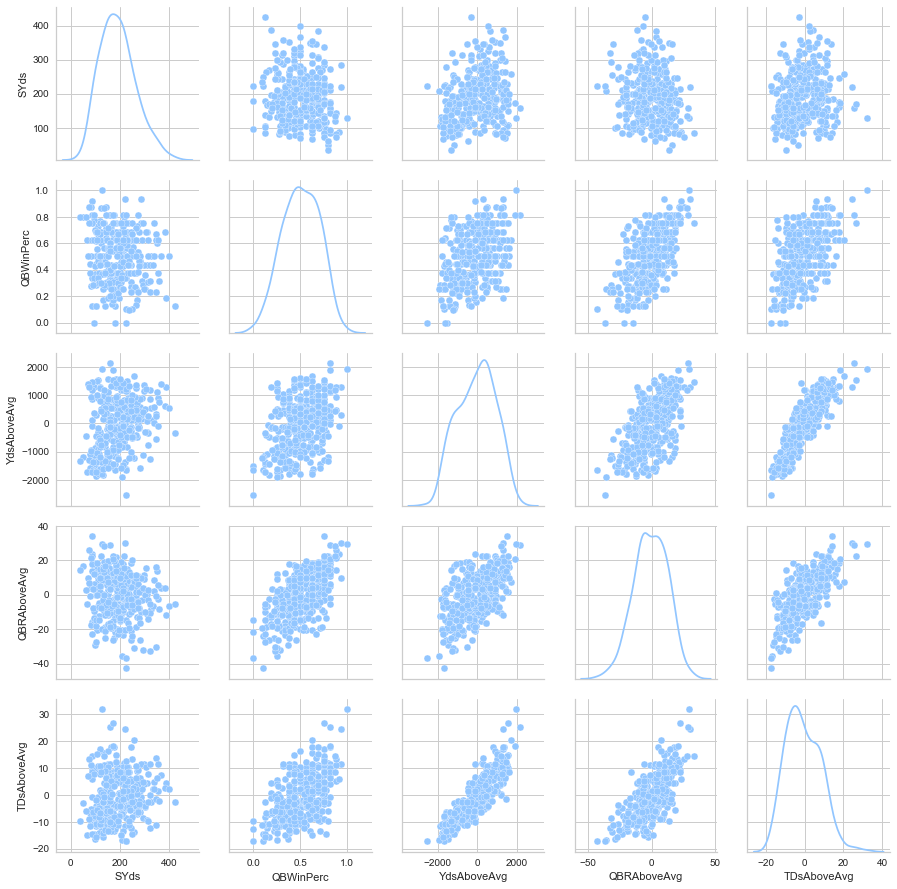

In [172]:
train_dataset = fulldata.sample(frac=0.8,random_state=0)
test_dataset = fulldata.drop(train_dataset.index)
multmap = sns.pairplot(train_dataset[list(vif['Features'])], diag_kind="kde")
#fig = multmap.get_figure()
multmap.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')

In [173]:
train_stats = train_samples.describe()
train_stats = train_stats.transpose()
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_samples)
normed_test_data = norm(test_samples)

In [174]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_samples.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])
    return model
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________


In [175]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_targets,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

.











In [176]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error,epoch
995,246.39,3.84,246.39,0.35,0.26,0.35,995
996,234.85,3.73,234.85,0.65,0.33,0.65,996
997,237.13,3.79,237.13,0.37,0.29,0.37,997
998,238.98,3.71,238.98,0.79,0.42,0.79,998
999,235.27,3.62,235.27,0.29,0.27,0.29,999


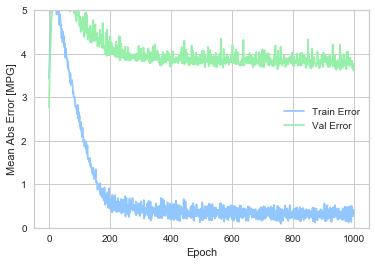

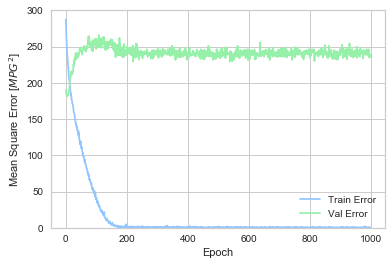

In [177]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([0,5])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.legend()
    plt.ylim([0,300])
    plt.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')
plot_history(history)


Testing set Mean Abs Error:  4.17 MPG


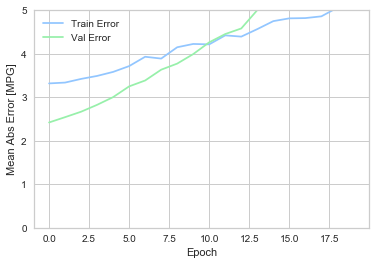

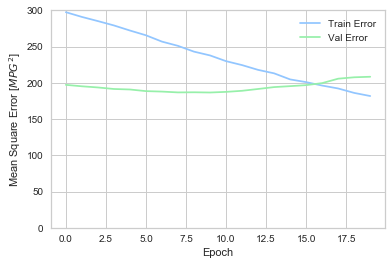

In [178]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_targets, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)
loss, mae, mse = model.evaluate(normed_test_data, test_targets, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

In [179]:
test_predictions = model.predict(rookRBTest.values).flatten()
#plt.scatter(train_targets, test_predictions)
#plt.xlabel('True Values [MPG]')
#plt.ylabel('Predictions [MPG]')
#plt.axis('equal')
#plt.axis('square')
#plt.xlim([0,plt.xlim()[1]])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])
tensRegPred = []
normtensRegPred=[]
for i,j in zip(test_predictions, rookRBNames):
    #print(i)
    tensRegPred.append(i)
for data in tensRegPred:
    normtensRegPred.append(normReg(data,tensRegPred))
for norm, name in zip(normtensRegPred,rookRBNames):
    print(norm,name)
y_predtensRegRB = model.predict(test_samples)
tensRegR2RB = abs(1/(r2_score(test_targets,y_predtensRegRB)))
print(tensRegR2RB)
tensRegR2RB = tensRegR2RB*100

1.2824155825703805 Jared Goff
2.0577075715863136 Jameis Winston
0.9217207201913353 Matt Ryan
0.5007941610090186 Tom Brady
0.4446354445766828 Carson Wentz
2.2341928631631203 Dak Prescott
1.156588905250584 Philip Rivers
0.4769877486083545 Aaron Rodgers*
0.6473667269778819 Kyler Murray
0.16091043916095202 Baker Mayfield
-0.5549209478712889 Andy Dalton
-1.2693771339514137 Mitchell Trubisky
1.0417687469796886 Russell Wilson*
0.3681125279228063 Derek Carr
-0.5280820770445809 Ryan Fitzpatrick
0.7571147792881405 Deshaun Watson*
-0.8168869063854755 Kyle Allen
0.4502856962437193 Patrick Mahomes*
0.3433027801336085 Jimmy Garoppolo
-0.34211561686270003 Gardner Minshew
-0.28076411356984804 Josh Allen
-1.223630653299386 Daniel Jones
-1.3822446471969319 Jacoby Brissett
-0.37354597494994285 Kirk Cousins
-1.3336355033384582 Sam Darnold
1.0957748529420792 Lamar Jackson*
-1.3459660041203405 Drew Brees*
-1.1148508547207192 Matthew Stafford
-1.2432441060623733 Ryan Tannehill
-0.7254725279929697 Mason Rudol

In [180]:
averagePred = []
thesePreds = []
#y_linReg,y_ridgeReg,y_lassoReg,y_theilReg,y_hubReg
for q,w,e,r,t in zip(normlinPred,normridgePred,normlassoPred,normtheilRegPred,normhubRegPred):
    thesePreds.append(float((q*abs(y_linReg[1])+w*abs(y_ridgeReg[1])+e*abs(y_lassoReg[1])+r*abs(y_theilReg[1])+t*abs(y_hubReg[1]))/(abs(y_linReg[1])+abs(y_ridgeReg[1])+abs(y_lassoReg[1])+abs(y_theilReg[1])+abs(y_hubReg[1]))))
for i,j,k,r,n,v in zip(linPred,ridgePred,lassoPred,theilRegPred,hubRegPred,tensRegPred):
    averagePred.append(float((i*linR2RB+j*ridgeR2RB+k*lassoR2RB+r*theilRegR2RB+n*hubRegR2RB+v*tensRegR2RB)/(linR2RB+ridgeR2RB+lassoR2RB+logR2RB+theilRegR2RB+hubRegR2RB+tensRegR2RB)))
for f,y in zip(thesePreds,rookRBNames):
    print(f,y)
averageFact = []
for fact,fact1 in zip(FactWeightForest,FactWeightGrad):
    averageFact.append(float((fact[0]+fact1[0])/2))

    
totalFact = [[m,g] for m,g in zip(averageFact,train_samples)]
sortedFact = sorted(totalFact, key=itemgetter(0))
print(sortedFact)

-0.864231843958664 Jared Goff
-0.12522729387396989 Jameis Winston
-0.748756699078045 Matt Ryan
-0.48680746065653285 Tom Brady
-0.6906886150838515 Carson Wentz
1.0338237401324455 Dak Prescott
-1.033258140843496 Philip Rivers
0.48531410228151084 Aaron Rodgers*
0.01149285459660503 Kyler Murray
-0.7581852011728208 Baker Mayfield
-1.4036425954948317 Andy Dalton
-0.7856489143957333 Mitchell Trubisky
1.3022995959873618 Russell Wilson*
-0.6090690608715309 Derek Carr
-1.3491554253287268 Ryan Fitzpatrick
1.4327835769879258 Deshaun Watson*
-0.580330309679766 Kyle Allen
0.7037596141520329 Patrick Mahomes*
0.594280135523886 Jimmy Garoppolo
0.1470251564127957 Gardner Minshew
1.8552958294468285 Josh Allen
-0.2850928184085164 Daniel Jones
-0.4314380604199753 Jacoby Brissett
0.639126632701882 Kirk Cousins
-0.17025386697994474 Sam Darnold
3.2666410441242126 Lamar Jackson*
0.6801938374769655 Drew Brees*
-0.3081082625553959 Matthew Stafford
-0.3149910892013041 Ryan Tannehill
-0.054628891822309664 Mason Ru

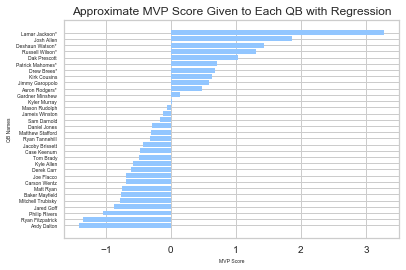

[[0.01149285459660503, 'Kyler Murray'], [0.1470251564127957, 'Gardner Minshew'], [0.48531410228151084, 'Aaron Rodgers*'], [0.594280135523886, 'Jimmy Garoppolo'], [0.639126632701882, 'Kirk Cousins'], [0.6801938374769655, 'Drew Brees*'], [0.7037596141520329, 'Patrick Mahomes*'], [1.0338237401324455, 'Dak Prescott'], [1.3022995959873618, 'Russell Wilson*'], [1.4327835769879258, 'Deshaun Watson*'], [1.8552958294468285, 'Josh Allen'], [3.2666410441242126, 'Lamar Jackson*']]


In [183]:
combinedAvg = [[i,j] for i,j in zip(thesePreds,rookRBNames)]
bestAvg = []
sortedNames = []
sortedValues = []
sortedTotal = sorted(combinedAvg, key=itemgetter(0))
index = 0
totalVal = 0
for m in sortedTotal:
    sortedValues.append(m[0])
    sortedNames.append(m[1])
    totalVal+=m[0]
    index+=1
totalVal = (totalVal/index)
totalVal = totalVal+(totalVal/3)
for i in combinedAvg:
    if i[0]>totalVal:
        bestAvg.append(i)
sortedAvg = sorted(bestAvg, key = itemgetter(0))
regMean = sum(sortedValues)/float(len(sortedValues))
regSTD = statistics.stdev(sortedValues)
regStandard = []
regTemp = 0
for data in sortedValues:
    regTemp = (data-regMean)/regSTD
    regStandard.append(regTemp)
regAvg = [[y,u] for y,u in zip(regStandard,sortedNames)]
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(rookRBNames))
    plt.barh(sortedNames,regStandard)
    plt.xlabel('MVP Score', fontsize=5)
    plt.ylabel('QB Names', fontsize=5)
    plt.yticks(sortedNames, fontsize=5, rotation=0)
    plt.title('Approximate MVP Score Given to Each QB with Regression')
    plt.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')
    plt.show()
    
plot_bar_x()
print(sortedAvg)

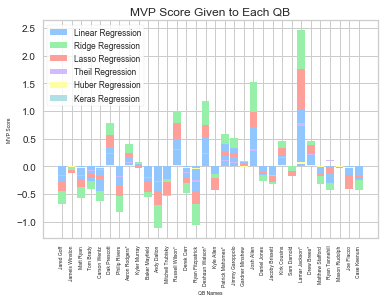

In [184]:
linNewPred = []
ridgeNewPred = []
lassoNewPred = []
theilNewPred = []
hubNewPred = []
tensNewPred = []
for i,j,k,r,n,v in zip(normlinPred,normridgePred,normlassoPred,normtheilRegPred,normhubRegPred,normtensRegPred):
    linNewPred.append(float((i*abs(y_linReg[1]))/(abs(y_linReg[1])+abs(y_ridgeReg[1])+abs(y_lassoReg[1])+abs(y_theilReg[1])+abs(y_hubReg[1]))))
    ridgeNewPred.append(float((j*abs(y_ridgeReg[1]))/(abs(y_linReg[1])+abs(y_ridgeReg[1])+abs(y_lassoReg[1])+abs(y_theilReg[1])+abs(y_hubReg[1]))))
    lassoNewPred.append(float((k*abs(y_lassoReg[1]))/(abs(y_linReg[1])+abs(y_ridgeReg[1])+abs(y_lassoReg[1])+abs(y_theilReg[1])+abs(y_hubReg[1]))))
    theilNewPred.append(float((r*abs(y_theilReg[1]))/(abs(y_linReg[1])+abs(y_ridgeReg[1])+abs(y_lassoReg[1])+abs(y_theilReg[1])+abs(y_hubReg[1]))))
    hubNewPred.append(float((n*abs(y_hubReg[1]))/(abs(y_linReg[1])+abs(y_ridgeReg[1])+abs(y_lassoReg[1])+abs(y_theilReg[1])+abs(y_hubReg[1]))))
    tensNewPred.append(float((v*tensRegR2RB)/(linR2RB+ridgeR2RB+lassoR2RB+logR2RB+theilRegR2RB+hubRegR2RB+tensRegR2RB)))
#x,y = pd.Series(allValues, name="Regression Values"), pd.Series(newCluster, name="Classifying Values")
#newX = x*0.5
#newY=y*0.5
#totalAvg = newX+newY
#sortedTotal = totalAvg.sort_values(ascending=False)
#sortedAvg = [[r,t] for r,t in zip(sortedTotal,sortedNames)]
#sortedX = newX.sort_values(ascending=False)
#sortedY = newY.sort_values(ascending=False)
index = np.arange(len(rookRBNames))
plt.bar(rookRBNames,linNewPred,label="Linear Regression")
plt.bar(rookRBNames,ridgeNewPred,bottom=linNewPred,label="Ridge Regression")
plt.bar(rookRBNames,lassoNewPred,bottom=ridgeNewPred,label="Lasso Regression")
plt.bar(rookRBNames,theilNewPred,bottom=lassoNewPred,label="Theil Regression")
plt.bar(rookRBNames,hubNewPred,bottom=theilNewPred,label="Huber Regression")
plt.bar(rookRBNames,tensNewPred,bottom=hubNewPred,label="Keras Regression")
plt.xlabel('QB Names', fontsize=5)
plt.ylabel('MVP Score', fontsize=5)
plt.xticks(rookRBNames, fontsize=5, rotation=90)
plt.title('MVP Score Given to Each QB')
plt.legend(frameon=True,fontsize='small',loc='best')
plt.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')
plt.show()

In [185]:
combinedCluster = []
for i,o,p,k,l,z,t in zip(treesPred,newTreesPred,gradientPred,MLPPred,GaussPred,sgdPred,logPred):
    combinedCluster.append((i*accuracy_test+o*accuracy_testRand+p*accuracy_testGrad+k*accuracy_testMLP+l*accuracy_testGauss+z*accuracy_testSGD+t*accuracy_testLog)/(accuracy_test+accuracy_testRand+accuracy_testGrad+accuracy_testMLP+accuracy_testGauss+accuracy_testSGD+accuracy_testLog))
combinedAll = [[i,j] for i,j in zip(combinedCluster,rookRBNames)]
completeAvg = []
for i,j in zip(combinedAll,combinedAvg):
    f = i[0]*0.5+j[0]*0.5
    completeAvg.append(f)
allAvg = []
allAvg = [[r,t] for r,t in zip(completeAvg,rookRBNames)]

sortedCompleteAvg = sorted(combinedAvg, key=itemgetter(0))
sortedNamedAvg = sorted(combinedAvg, key=itemgetter(1))
print(sortedCompleteAvg)


[[-1.4036425954948317, 'Andy Dalton'], [-1.3491554253287268, 'Ryan Fitzpatrick'], [-1.033258140843496, 'Philip Rivers'], [-0.864231843958664, 'Jared Goff'], [-0.7856489143957333, 'Mitchell Trubisky'], [-0.7581852011728208, 'Baker Mayfield'], [-0.748756699078045, 'Matt Ryan'], [-0.6906886150838515, 'Carson Wentz'], [-0.6810176860751965, 'Joe Flacco'], [-0.6090690608715309, 'Derek Carr'], [-0.580330309679766, 'Kyle Allen'], [-0.48680746065653285, 'Tom Brady'], [-0.47150388392384035, 'Case Keenum'], [-0.4314380604199753, 'Jacoby Brissett'], [-0.3149910892013041, 'Ryan Tannehill'], [-0.3081082625553959, 'Matthew Stafford'], [-0.2850928184085164, 'Daniel Jones'], [-0.17025386697994474, 'Sam Darnold'], [-0.12522729387396989, 'Jameis Winston'], [-0.054628891822309664, 'Mason Rudolph'], [0.01149285459660503, 'Kyler Murray'], [0.1470251564127957, 'Gardner Minshew'], [0.48531410228151084, 'Aaron Rodgers*'], [0.594280135523886, 'Jimmy Garoppolo'], [0.639126632701882, 'Kirk Cousins'], [0.680193837

In [129]:
#with open('MVPData/MVP.csv', 'a',newline='') as csv_file:
 #   writer = csv.writer(csv_file)
  #  writer.writerows(regAvg)

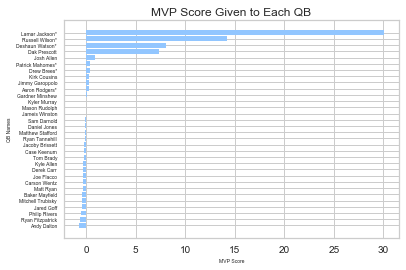

In [186]:
sortedAvg = sorted(allAvg, key=itemgetter(0))
allValues = []
allNames = []
for m in sortedAvg:
    allValues.append(m[0][0])
    allNames.append(m[1])
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(rookRBNames))
    plt.barh(allNames,allValues)
    plt.xlabel('MVP Score', fontsize=5)
    plt.ylabel('QB Names', fontsize=5)
    plt.yticks(allNames, fontsize=5, rotation=0)
    plt.title('MVP Score Given to Each QB')
    plt.show()
plot_bar_x()

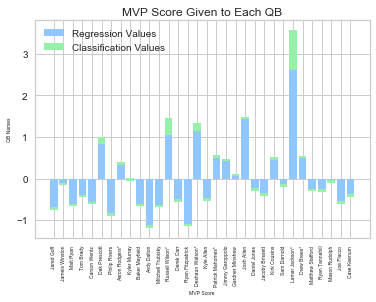

In [187]:
sortedAvg = sorted(allAvg, key=itemgetter(0))
totalMean = sum(sortedValues)/float(len(sortedValues))
totalSTD = statistics.stdev(sortedValues)
totalStandard = []
totalTemp = 0
for data in combinedAvg:
    totalTemp = (data[0]-totalMean)/totalSTD
    totalStandard.append(totalTemp)
totalAvg = [[y,u] for y,u in zip(totalStandard,rookRBNames)]
allValues = []
allNames = []
sortedCluster = []
newCluster = []
sortedNames = []
thisCluster = []
for cluster in combinedCluster:
    thisCluster.append(cluster[0])
clusterMean = sum(thisCluster)/float(len(thisCluster))
clusterSTD = statistics.stdev(thisCluster)
clusterStandard = []
clusterTemp = 0
for data in combinedCluster:
    clusterTemp = (data[0]-clusterMean)/clusterSTD
    clusterStandard.append(clusterTemp)
clusterAvg = [[k,d] for k,d in zip(clusterStandard,rookRBNames)]
for name in sortedAvg:
    sortedNames.append(name[1])
sortedNames = sortedNames[::-1]
for i in clusterAvg:
    newCluster.append(i[0])
for m in totalAvg:
    allValues.append(m[0])
    allNames.append(m[1])
    # this is for plotting purpose
x,y = pd.Series(allValues, name="Regression Values"), pd.Series(newCluster, name="Classifying Values")
newX = x*0.8
newY=y*0.2
totalAvg = newX+newY
sortedTotal = totalAvg.sort_values(ascending=False)
sortedAvg = [[r,t] for r,t in zip(sortedTotal,sortedNames)]
sortedX = newX.sort_values(ascending=False)
sortedY = newY.sort_values(ascending=False)
index = np.arange(len(rookRBNames))
plt.bar(rookRBNames,newX,label="Regression Values")
plt.bar(rookRBNames,newY,bottom=newX,label="Classification Values")
#plt.barh(allNames,allValues)
plt.xlabel('MVP Score', fontsize=5)
plt.ylabel('QB Names', fontsize=5)
plt.xticks(rookRBNames, fontsize=5, rotation=90)
plt.title('MVP Score Given to Each QB')
plt.legend()
plt.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')
plt.show()


In [87]:
print(sortedNames)

['Russell Wilson*', 'Lamar Jackson*', 'Dak Prescott', 'Deshaun Watson*', 'Patrick Mahomes*', 'Jameis Winston', 'Josh Allen', 'Drew Brees*', 'Kirk Cousins', 'Jimmy Garoppolo', 'Aaron Rodgers*', 'Gardner Minshew', 'Kyler Murray', 'Mason Rudolph', 'Sam Darnold', 'Daniel Jones', 'Matthew Stafford', 'Ryan Tannehill', 'Jacoby Brissett', 'Case Keenum', 'Tom Brady', 'Kyle Allen', 'Derek Carr', 'Joe Flacco', 'Carson Wentz', 'Matt Ryan', 'Baker Mayfield', 'Mitchell Trubisky', 'Jared Goff', 'Philip Rivers', 'Ryan Fitzpatrick', 'Andy Dalton']


In [85]:
with open('MVPData/MVP.csv', 'a',newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(sortedAvg)

C:\Users\Eric\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


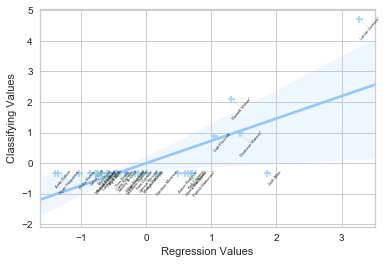

In [188]:
thisCluster = []
sortedCluster = []
sortedCluster = sorted(combinedCluster, key=itemgetter(0))
for i in sortedCluster:
    thisCluster.append(i[0])
x,y = pd.Series(allValues, name="Regression Values"), pd.Series(newCluster, name="Classifying Values")
ax = sns.regplot(x=x, y=y, marker="+")
regPlot = ax.get_figure()
for i, txt in enumerate(allNames):
    ax.annotate(txt, (x[i], y[i]),rotation=50,size=4,arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='lightgreen'))
regPlot.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')

In [142]:
print(newCluster)

[-0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, 3.0545328222570296, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, 3.0545328222570296, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, 3.0713883232593098, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817, -0.3165673781990817]


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


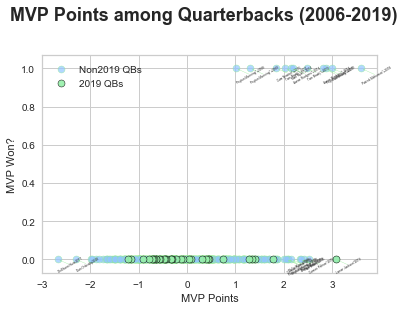

In [191]:
plt.style.use('seaborn-pastel')
print(plt.style.available)
non2018MVPs, ax = plt.subplots()
s1 = pd.Series(dfAllMVPs['Player'])
s2 = pd.Series(dfAllMVPs['Year'])
s4 = pd.Series(dfAllMVPs['MVPPoints'])
s5 = pd.Series(dfAllMVPs['MVP'])
s9 = pd.Series(dfAllMVPs['2019'])
s3 = []
s6 = []
s7 = []
s8 = []
s10 = []
s11 = []
for player,year,points,mvp,this in zip(s1,s2,s4,s5,s9):
    if points>2 or mvp == 1 or points<-2:
        player+=str(year)
        s3.append(player)
        s6.append(points)
        s7.append(mvp)
    if this==1:
        s8.append(player)
        s10.append(points)
        s11.append(mvp)
thisYear = [[i,j] for i,j in zip(s8,s10)]
ax.scatter(s4, s5,edgecolors='lightgreen',linewidths=0.5,alpha=0.7,label = "Non2019 QBs")
ax.scatter(s10,s11,edgecolors='black',linewidths=0.5,alpha=0.9,label="2019 QBs")
for i, txt in enumerate(s3):
    ax.annotate(txt, (s6[i], s7[i]),rotation=30,size=3,arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='lightgreen'))
non2018MVPs.suptitle("MVP Points among Quarterbacks (2006-2019)", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("MVP Points")
ax.set_ylabel("MVP Won?")
ax.legend()
non2018MVPs.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


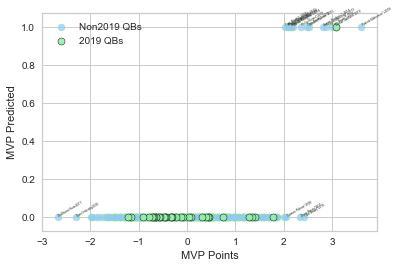

In [192]:
plt.style.use('seaborn-pastel')
print(plt.style.available)
t2018MVPs, ax = plt.subplots()
s1 = pd.Series(dfAllMVPs['Player'])
s2 = pd.Series(dfAllMVPs['Year'])
s4 = pd.Series(dfAllMVPs['MVPPoints'])
s5 = pd.Series(dfAllMVPs['PredMVP'])
s9 = pd.Series(dfAllMVPs['2019'])
s3 = []
s6 = []
s7 = []
s8 = []
s10 = []
s11 = []
for player,year,points,mvp,this in zip(s1,s2,s4,s5,s9):
    if points>2 or mvp == 1 or points<-2:
        player+=str(year)
        s3.append(player)
        s6.append(points)
        s7.append(mvp)
    if this==1:
        s8.append(player)
        s10.append(points)
        s11.append(mvp)
thisYear = [[i,j] for i,j in zip(s8,s10)]
ax.scatter(s4, s5,edgecolors='lightgreen',linewidths=0.5,alpha=0.7,label = "Non2019 QBs")
ax.scatter(s10,s11,edgecolors='black',linewidths=0.5,alpha=0.9,label="2019 QBs")
for i, txt in enumerate(s3):
    ax.annotate(txt, (s6[i], s7[i]),rotation=30,size=3,ha='left',va='bottom',arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3",color='lightgreen'))
non2018MVPs.suptitle("MVP Points among Quarterbacks (2006-2019)", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("MVP Points")
ax.set_ylabel("MVP Predicted")
ax.legend()
t2018MVPs.savefig('MVPData/non2018MVPs.png', dpi = 400, bbox_inches = 'tight')